# <center>DIABETES DATA ANALYSIS</center>

### Modules

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Initializing the dataframe

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

### Data Wrangling

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Exploration

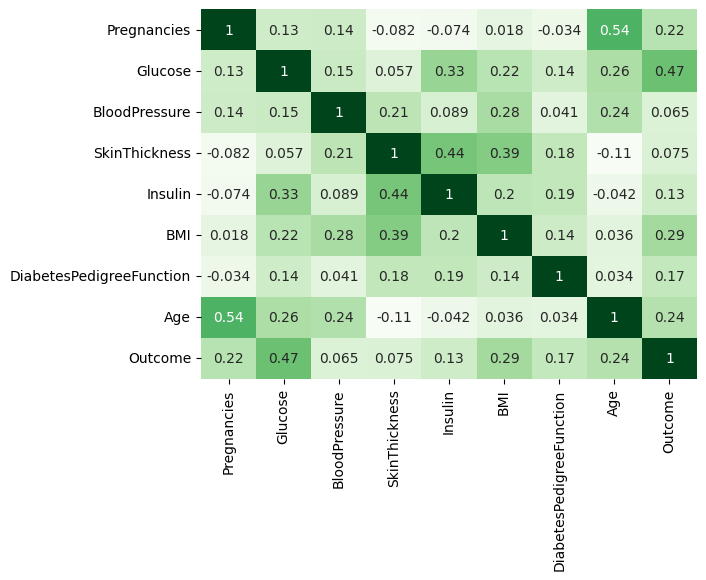

In [10]:
sns.heatmap(data=df.corr(), annot=True, cmap='Greens', cbar=False)
plt.show()

In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Model Training

In [12]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

##### Normalizing the data - Normal Distribution
mean : 0  
std : 1  


In [16]:
scaler = StandardScaler()

Whenever we apply the Standard Scaler, we will perform fit & transform in the training data and we only perform the transformation on the training data.

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
np.mean(X_train), np.std(X_train)

(1.8850285067943414e-17, 1.0)

In [19]:
np.mean(X_test), np.std(X_test)

(-0.02046749446215337, 0.9583971477855755)

##### Initializing the Model

In [20]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

##### Evaluation of Model using test data

In [22]:
accuracy_score(y_test, regressor.predict(X_test))

0.7662337662337663

The accuracy of the model is 76.62%.